<a href="https://colab.research.google.com/github/abdinegara783/ISFEST2023/blob/main/DATA_PREPARATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mengimport Library yang di butuhkan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#membaca Dataset
df=pd.read_csv('/content/jabodetabek_house_price.csv')
df.head(5)

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0,1,2.0,5.0,2017.0,bagus,NaN,0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0,0,2.0,NaN,NaN,bagus,NaN,0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1,1,2.0,NaN,NaN,bagus,NaN,1,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1,1,2.0,6.0,2016.0,bagus sekali,utara,2,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1,1,2.0,9.0,2013.0,bagus,utara,1,unfurnished


In [ ]:
def data_understanding(data):
    # Memeriksa dimensi Data
    print('\nDimensi Data:\n\n')
    print(data.shape)

    # Memeriksa format dan kelengkapan variabel data
    print("\nInformasi tipe data dan kelengkapan variabel:\n\n")
    print(data.info())

    # Mengeksplorasi statistik deskriptif dari setiap variabel
    print("\nStatistik deskriptif:\n\n")
    print(data.describe())

    # Memeriksa keberadaan nilai yang hilang (missing values) dalam data
    print("\nJumlah nilai yang hilang dalam setiap variabel:\n\n")
    print(data.isnull().sum())

    # Memeriksa keberadaan nilai yang duplikat dalam data
    print("\nJumlah nilai duplikat dalam data:\n\n")
    print(data.duplicated().sum())
    # Melihat variabel unik dalam data
    for column in df.columns:
      unique_values = df[column].nunique()
      print(f"Variabel {column}: {unique_values}")


# Contoh penggunaan fungsi
data_understanding(df)


Dimensi Data:


(3553, 27)

Informasi tipe data dan kelengkapan variabel:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64


#**Mendeteksi Outlier**

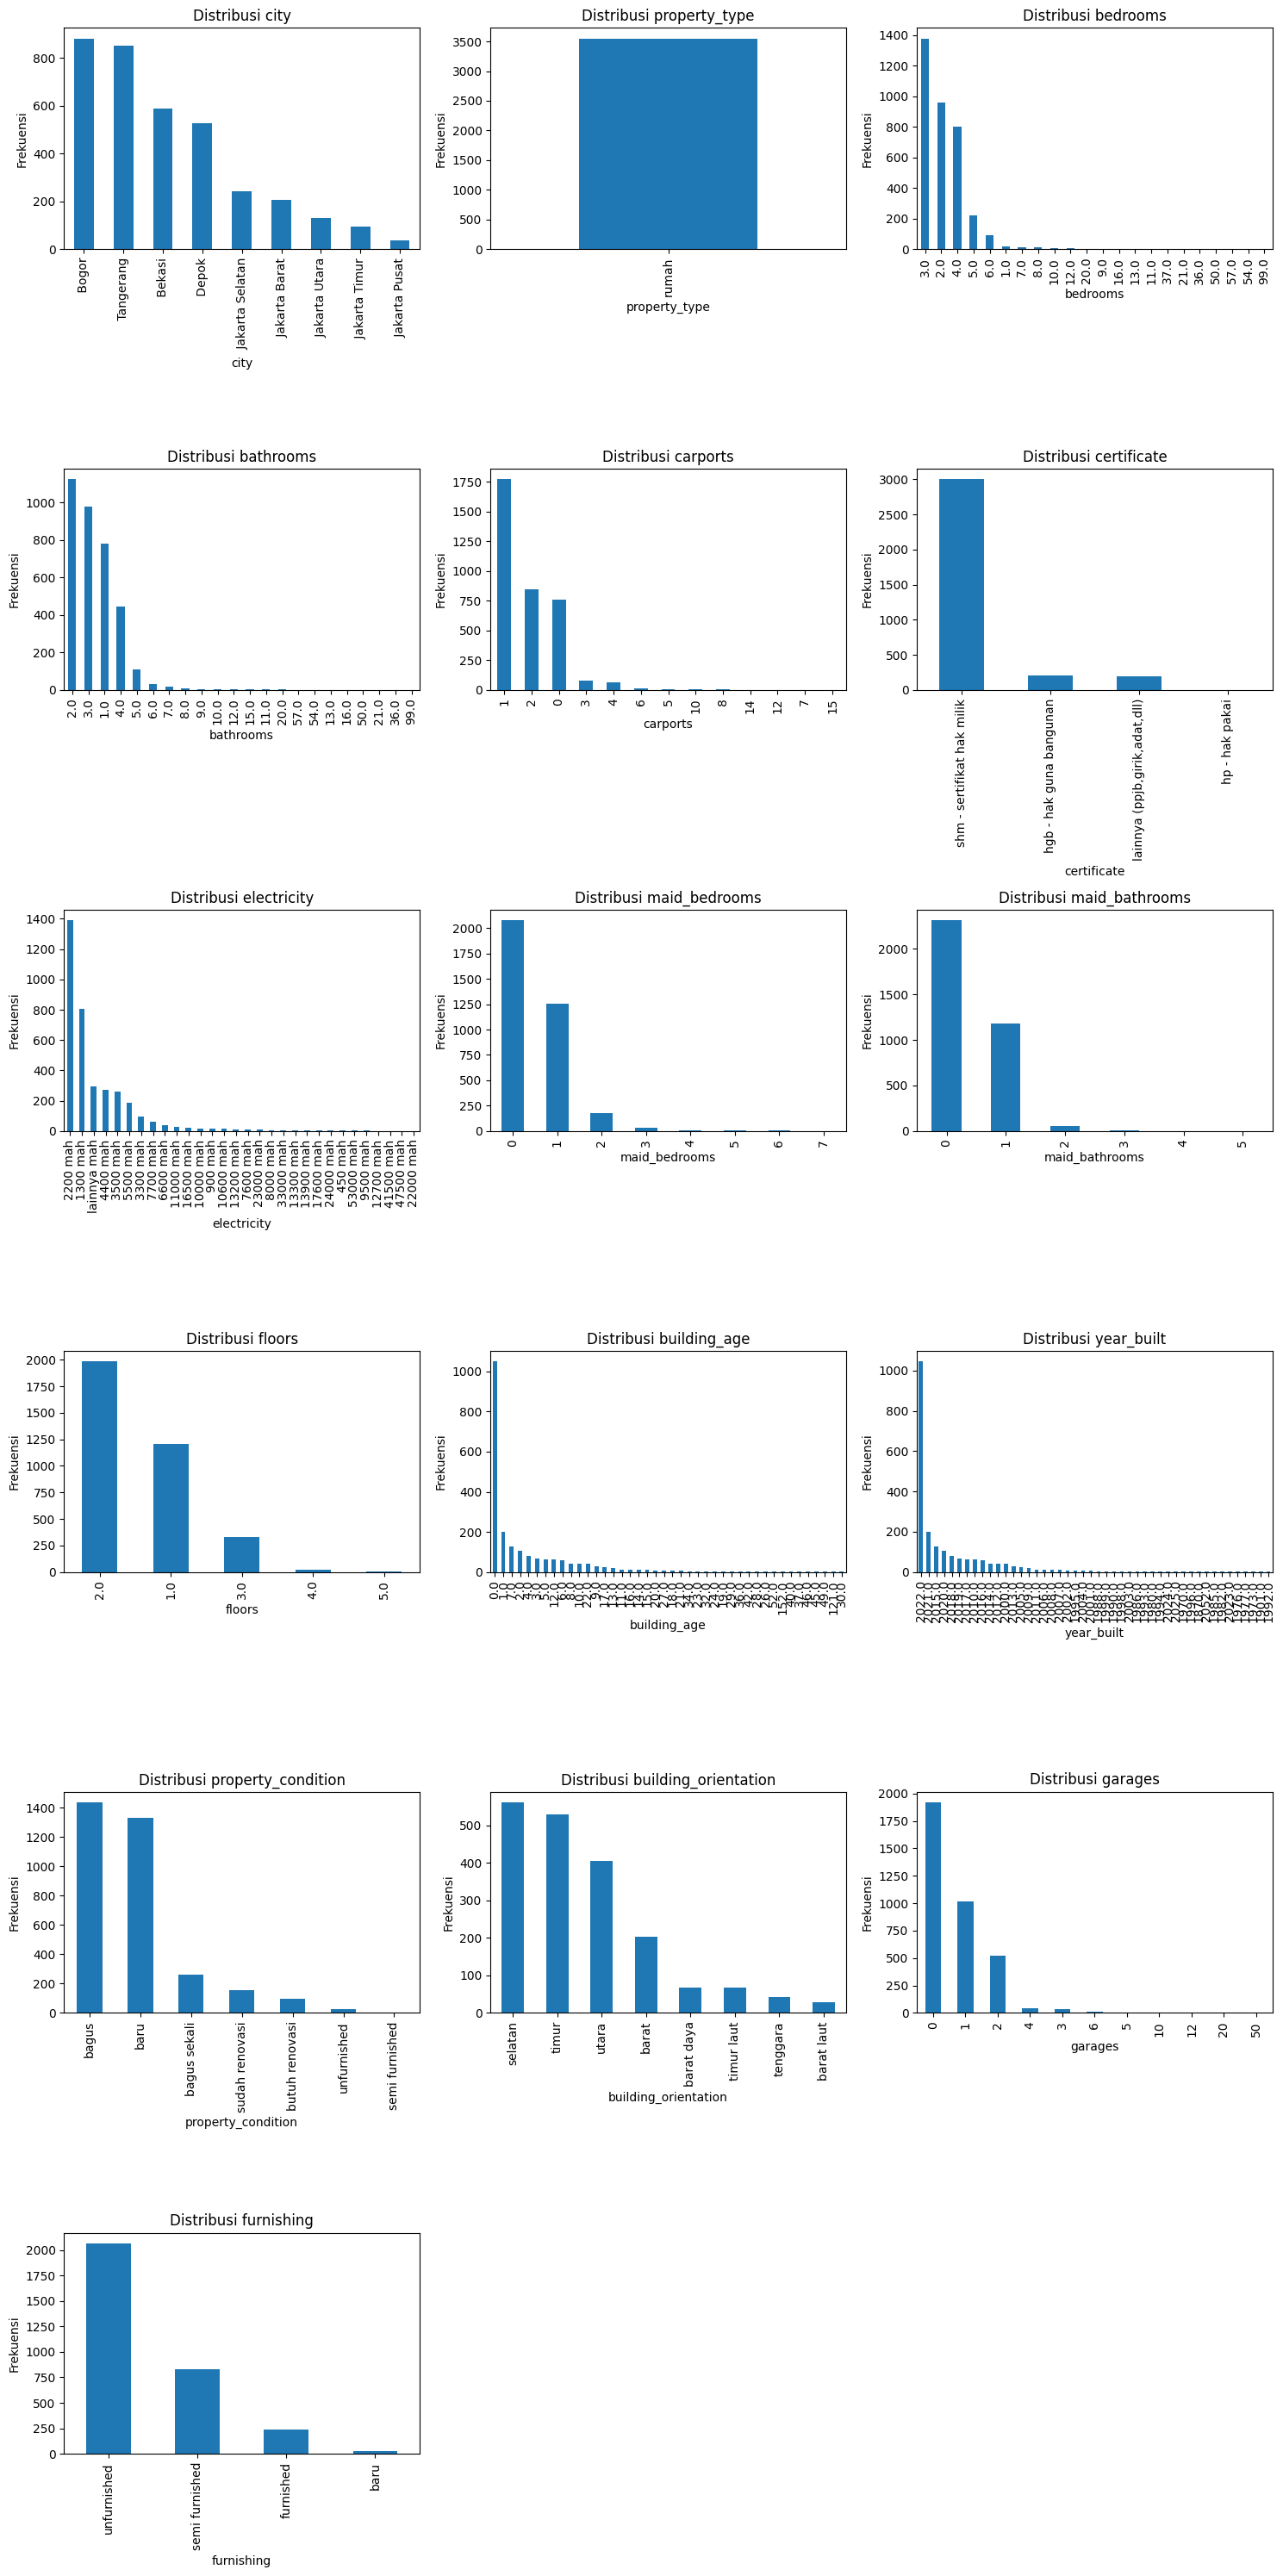

In [ ]:
# Mengambil variabel dengan jumlah unik di bawah 100
unique_vars = [var for var in df.columns if df[var].nunique() < 100]

# Membuat kanvas yang besar
num_rows = len(unique_vars) // 3 + (len(unique_vars) % 3 > 0)
plt.figure(figsize=(15, 5*num_rows))

# Menggambar plot untuk setiap variabel
for i, var in enumerate(unique_vars):
    plt.subplot(num_rows, 3, i+1)
    df[var].value_counts().plot(kind='bar')
    plt.title(f"Distribusi {var}")
    plt.xlabel(var)
    plt.ylabel("Frekuensi")

# Menampilkan plot
plt.tight_layout()
plt.show()

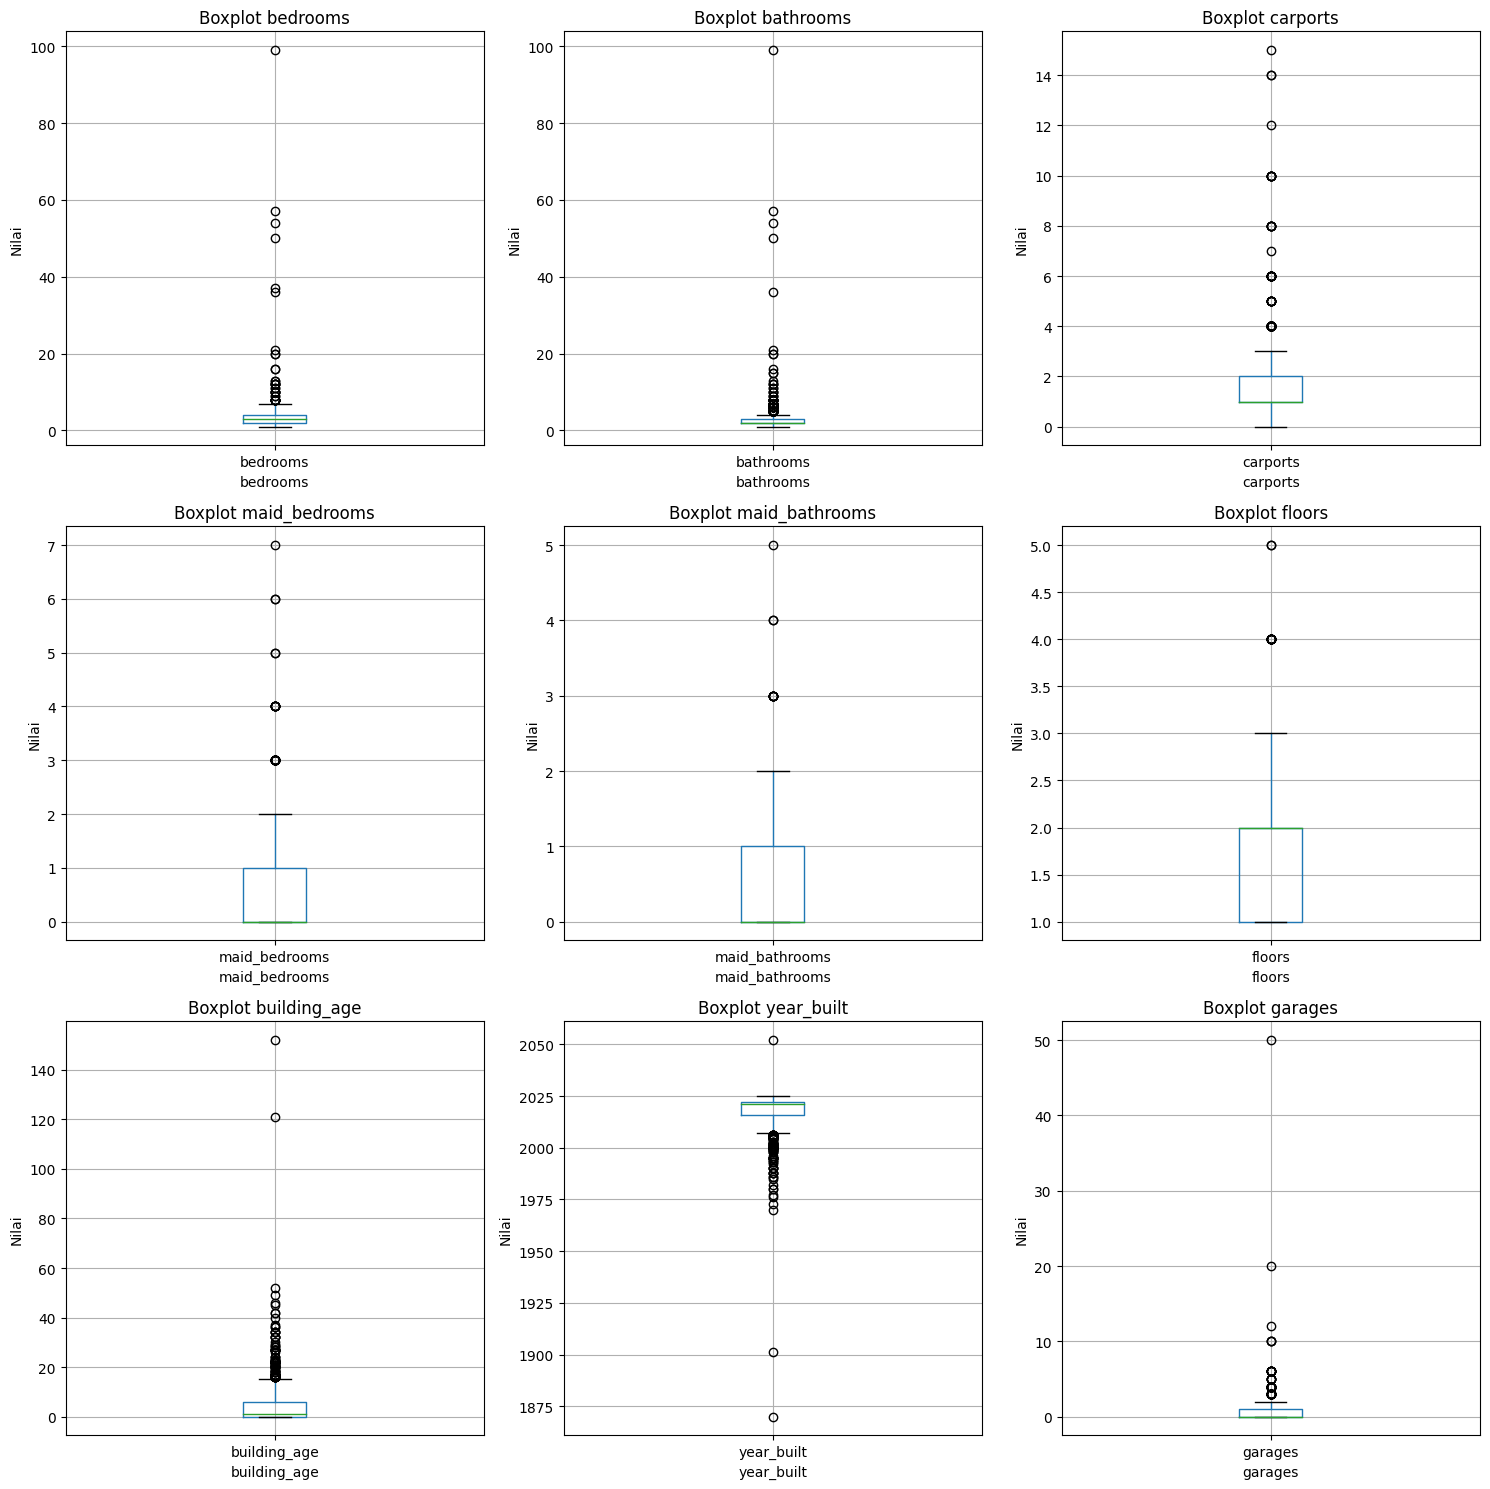

In [ ]:
def plot_boxplot(df):
    unique_vars = [var for var in df.columns if df[var].nunique() < 100 and np.issubdtype(df[var].dtype, np.number)]
    num_rows = len(unique_vars) // 3 + (len(unique_vars) % 3 > 0)
    plt.figure(figsize=(15, 5*num_rows))

    for i, var in enumerate(unique_vars):
        plt.subplot(num_rows, 3, i+1)
        df.boxplot(column=var)
        plt.title(f"Boxplot {var}")
        plt.xlabel(var)
        plt.ylabel("Nilai")

    plt.tight_layout()
    plt.show()
plot_boxplot(df)

In [ ]:
def fill_outliers_with_mode(df, column, outlier_threshold):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - outlier_threshold * IQR
    upper_bound = Q3 + outlier_threshold * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    mode_value = df[column].mode().values[0]

    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mode_value

    return df

In [ ]:
df_filled = fill_outliers_with_mode(df, 'bedrooms', 1.5)
df_filled = fill_outliers_with_mode(df, 'bathrooms', 1.5)
df_filled = fill_outliers_with_mode(df, 'garages', 1.5)
df_filled = fill_outliers_with_mode(df, 'floors', 1.5)
df_filled = fill_outliers_with_mode(df, 'carports', 1.5)
df_filled = fill_outliers_with_mode(df, 'maid_bathrooms', 1.5)

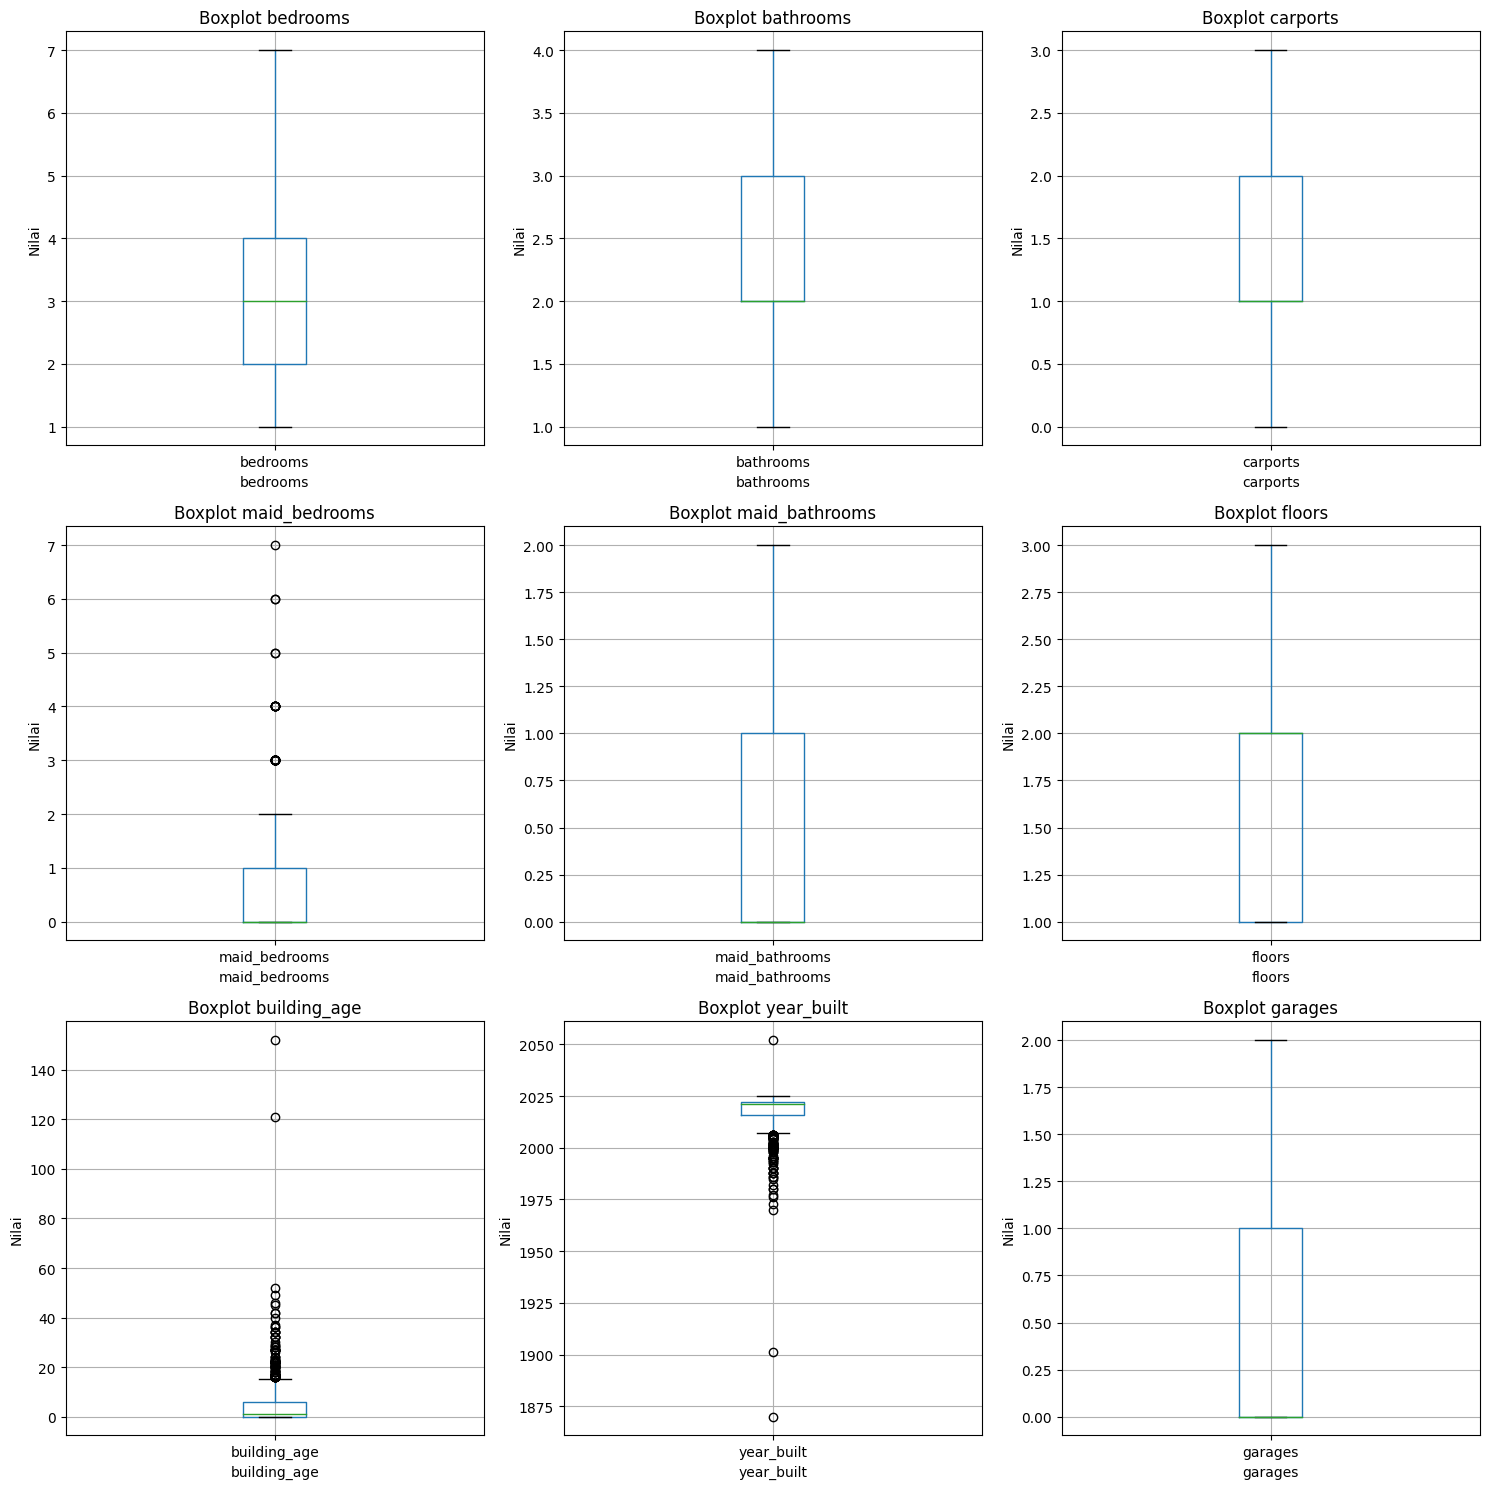

In [ ]:
plot_boxplot(df_filled)

#**Mendeteksi Missing Value**

In [ ]:
df_baru =df.drop(['building_age','year_built','building_orientation'], axis=1)

In [ ]:
df_baru = df_baru.drop(['property_type','ads_id'], axis =1)

In [ ]:
df_baru['certificate'].fillna('Tidak diketahui', inplace=True)
df_baru['furnishing'].fillna('Tidak diketahui', inplace=True)
df_baru['property_condition'].fillna('Tidak diketahui', inplace=True)
# Menentukan nilai modus
modus_A = df['bathrooms'].mode()[0]
modus_B = df['bedrooms'].mode()[0]
# Menggantikan nilai NaN dengan nilai modus
df_baru['bathrooms'] = df_baru['bathrooms'].fillna(modus_A)
df_baru['bedrooms'] = df_baru['bedrooms'].fillna(modus_B)

In [ ]:
modus_A = df['floors'].mode()[0]
df_baru['floors'] = df_baru['floors'].fillna(modus_A)

In [ ]:
# Menggantikan nilai NaN dengan nilai modus
df_baru['land_size_m2'] = df_baru['land_size_m2'].fillna(np.mean(df_baru['land_size_m2']))
df_baru['building_size_m2'] = df_baru['building_size_m2'].fillna(np.mean(df_baru['building_size_m2']))

In [ ]:
#mendefinisikan fungsi
def find_missing_values(df):
    missing_values = df.isnull().sum()
    return missing_values
find_missing_values(df_baru)

url                   0
price_in_rp           0
title                 0
address               0
district              0
city                  0
lat                   0
long                  0
facilities            0
bedrooms              0
bathrooms             0
land_size_m2          0
building_size_m2      0
carports              0
certificate           0
electricity           0
maid_bedrooms         0
maid_bathrooms        0
floors                0
property_condition    0
garages               0
furnishing            0
dtype: int64

In [41]:
# Menyimpan dataframe ke file CSV tanpa indeks
df_baru.to_csv('DATA_PREPARATION.csv', index=False)